## **EDA and viz on cleaned data**

Purpose of the file is to conduct EDA after cleaning and imputation

In [34]:
import matplotlib.pyplot as plt
import missingno as msno
import pandas as pd
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns', None)
sns.set_theme

<function seaborn.rcmod.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)>

In [7]:
df = pd.read_csv("New Final Candidates Cleaned.csv")

In [21]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,geo_name,year,votes,vote_share,incumbent,winner,prob_democrat,prob_republican,pid_est,prob_male,prob_female,gender_est,prob_black,prob_white,prob_hispanic,prob_asian,prob_other,race_est,contributor.cfscore,percent_women,percent_white,percent_black,percent_hispanic,percent_asian_american,candidate_count,UE 12Mo Avg,UE 12Mo Max,UE 12Mo Min,UE 3Mo Avg,UE 3Mo Max,UE 3Mo Min,CPI 12Mo Avg,CPI 12Mo Max,CPI 12Mo Min,CPI 3Mo Avg,CPI 3Mo Max,CPI 3Mo Min,pid_est_knn,gender_est_knn,race_est_knn
0,Abilene,1996,3826.0,0.89,1.0,1,0.050000,0.950000,Republican,1.0,0.0,Male,0.00,1.00,0.0,0.0,0.0,Caucasian,1.020000,0.502459,0.798016,0.080899,0.178764,0.101590,2,5.591667,5.7,5.5,5.533333,5.6,5.5,153.791667,156.10,152.10,155.533333,156.10,155.000,1.000000,1.0,2.0
1,Abilene,1996,451.0,0.11,0.0,0,0.573265,0.426735,Unknown,1.0,0.0,Male,0.03,0.97,0.0,0.0,0.0,Caucasian,-0.145909,0.502459,0.798016,0.080899,0.178764,0.101590,2,5.591667,5.7,5.5,5.533333,5.6,5.5,153.791667,156.10,152.10,155.533333,156.10,155.000,0.417135,1.0,2.0
2,Akron,2003,26967.0,0.71,1.0,1,1.000000,0.000000,Democrat,1.0,0.0,Male,0.00,1.00,0.0,0.0,0.0,Caucasian,-0.850000,0.520664,0.657211,0.293766,0.014515,0.022447,2,6.025000,6.3,5.8,6.066667,6.1,6.0,183.400000,185.10,181.50,184.833333,185.10,184.500,0.000000,1.0,2.0
3,Akron,2003,11171.0,0.29,0.0,0,0.000000,1.000000,Republican,1.0,0.0,Male,0.58,0.41,0.0,0.0,0.0,Black,0.550000,0.520664,0.657211,0.293766,0.014515,0.022447,2,6.025000,6.3,5.8,6.066667,6.1,6.0,183.400000,185.10,181.50,184.833333,185.10,184.500,1.000000,1.0,1.0
4,Akron,2011,31674.0,0.70,1.0,1,1.000000,0.000000,Democrat,1.0,0.0,Male,0.00,1.00,0.0,0.0,0.0,Caucasian,-0.362011,0.517043,0.619837,0.313499,0.022048,0.030919,2,9.100000,9.8,8.8,8.933333,9.0,8.8,223.728833,226.75,219.59,226.484333,226.75,226.106,0.000000,1.0,2.0


####  **Descriptive EDA**

In [67]:
min_year = df['year'].min()
max_year = df['year'].max()
min_candidates = df['candidate_count'].min()
max_candidates = df['candidate_count'].max()
unique_geo = df['geo_name'].nunique()

In [68]:
print(f"Observations: {len(df)}\n")
print(f"Unique geographies: {unique_geo}\n")

print(f"Minimum year: {min_year}")
print(f"Median year: {df['year'].median()}")
print(f"Maximum year: {max_year}\n")


print(f"Minimum candidate count: {min_candidates}")
print(f"Median candidate count: {df['candidate_count'].median()}")
print(f"Maximum candidate count: {max_candidates}\n")

Observations: 5025

Unique geographies: 459

Minimum year: 1993
Median year: 2009.0
Maximum year: 2021

Minimum candidate count: 2
Median candidate count: 3.0
Maximum candidate count: 33



In [117]:
df.describe()

,year,votes,vote_share,incumbent,winner,prob_democrat,prob_republican,prob_male,prob_female,prob_black,prob_white,prob_hispanic,prob_asian,prob_other,contributor.cfscore,percent_women,percent_white,percent_black,percent_hispanic,percent_asian_american,candidate_count,UE 12Mo Avg,UE 12Mo Max,UE 12Mo Min,UE 3Mo Avg,UE 3Mo Max,UE 3Mo Min,CPI 12Mo Avg,CPI 12Mo Max,CPI 12Mo Min,CPI 3Mo Avg,CPI 3Mo Max,CPI 3Mo Min,pid_est_knn,gender_est_knn,race_est_knn
count,5025.000000,5025.000000,5025.000000,5025.000000,5025.000000,5025.000000,5025.000000,5025.000000,5025.000000,5025.000000,5025.000000,5025.000000,5025.000000,5025.000000,5025.000000,5025.000000,5025.000000,5025.000000,5025.000000,5025.000000,5025.000000,5025.000000,5025.000000,5025.000000,5025.000000,5025.00000,5025.000000,5025.000000,5025.000000,5025.000000,5025.000000,5025.000000,5025.000000,5025.000000,5025.000000,5025.000000
mean,2008.792239,13929.670846,0.348581,0.356816,0.348856,0.578734,0.421266,0.805331,0.194669,0.158983,0.727064,0.087560,0.024538,0.000705,0.080038,0.512435,0.618395,0.186259,0.223052,0.131932,4.008955,5.862590,6.577930,5.299284,5.797831,5.92999,5.667204,210.665825,213.226225,208.196106,212.518624,213.071662,211.935589,0.411051,0.805176,1.902456
std,8.137516,40792.297694,0.256004,0.479108,0.476656,0.401397,0.401397,0.373622,0.373622,0.308747,0.381381,0.247163,0.130374,0.018175,0.623120,0.012141,0.187042,0.176569,0.201733,0.121367,3.657854,1.627447,2.448962,1.517318,1.721287,1.80147,1.669930,35.761234,36.253190,35.333892,36.082360,36.226005,35.964097,0.452201,0.384190,0.548041
min,1993.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.130000,0.438319,0.110893,0.001794,0.004866,0.006186,2.000000,3.616667,3.800000,3.500000,3.566667,3.60000,3.500000,141.058333,143.100000,139.100000,142.733333,143.100000,142.300000,0.000000,0.000000,0.000000
25%,2002.000000,1887.000000,0.100000,0.000000,0.000000,0.100000,0.000000,0.900000,0.000000,0.000000,0.480000,0.000000,0.000000,0.000000,-0.362011,0.505606,0.478023,0.045950,0.062479,0.043541,2.000000,4.550000,4.700000,4.200000,4.566667,4.70000,4.500000,179.166667,181.200000,177.400000,180.833333,181.200000,180.500000,0.000000,1.000000,2.000000
50%,2009.000000,5727.000000,0.350000,0.000000,0.000000,0.573265,0.426735,1.000000,0.000000,0.000000,0.970000,0.000000,0.000000,0.000000,-0.145909,0.513130,0.639329,0.128496,0.154254,0.090068,3.000000,5.441667,5.800000,4.900000,5.233333,5.30000,5.100000,215.156250,219.016000,211.398000,217.374000,218.877000,216.995000,0.417135,1.000000,2.000000
75%,2016.000000,12931.000000,0.550000,1.000000,1.000000,1.000000,0.900000,1.000000,0.100000,0.120000,1.000000,0.020000,0.000000,0.000000,0.822490,0.520614,0.761503,0.272300,0.330807,0.179178,4.000000,6.975000,7.800000,5.800000,6.766667,6.80000,6.700000,239.265000,241.741000,237.336000,241.154000,241.741000,240.545000,1.000000,1.000000,2.000000
max,2021.000000,930236.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.640000,1.880000,0.553268,0.977264,0.845852,0.956199,0.714074,33.000000,9.766667,14.800000,9.500000,11.466667,14.80000,10.200000,267.911750,276.528000,260.911000,274.407333,276.528000,272.752000,1.000000,1.000000,4.000000


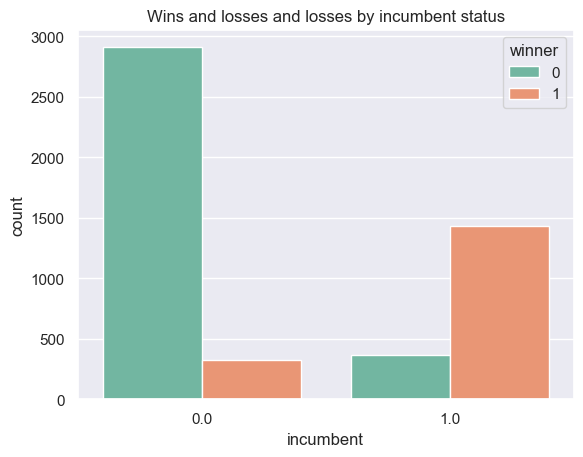

In [63]:
sns.countplot(x=df['incumbent'] ,data=df, hue = df['winner'], palette="Set2")
plt.title("Wins and losses and losses by incumbent status")
plt.show()

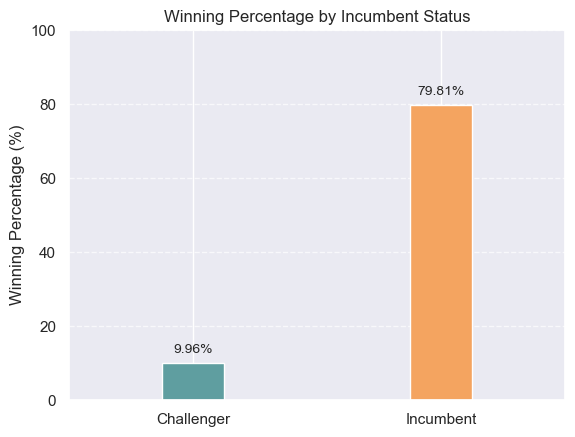

In [160]:
win_rate_by_incumbent = df.groupby('incumbent')['winner'].mean() * 100  # multiply by 100 to get percentage

labels = ['Challenger', 'Incumbent']
percentages = win_rate_by_incumbent.to_list()
x_pos = [0, 2]

for i, value in enumerate(percentages):
    plt.text(x_pos[i], value+2, f'{value:.2f}%', ha='center', va='bottom', fontsize=10)

plt.bar(x_pos, percentages, color=['cadetblue', 'sandybrown'], width=0.5)
plt.xticks(x_pos, labels)
plt.ylabel('Winning Percentage (%)')
plt.title('Winning Percentage by Incumbent Status')
plt.ylim(0, 100)
plt.xlim(-1, 3)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

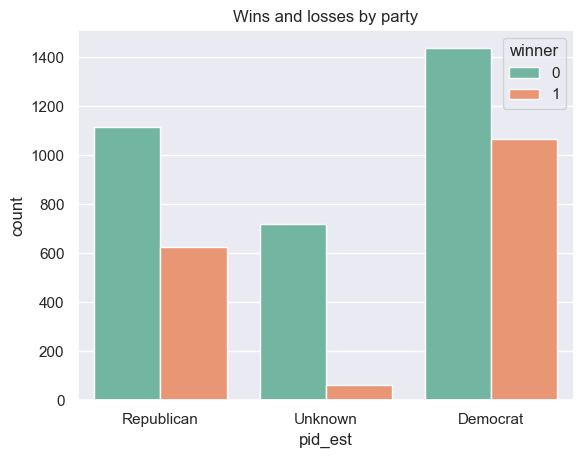

In [65]:
sns.countplot(x=df['pid_est'] ,data=df, hue = df['winner'], palette="Set2")
plt.title("Wins and losses by party")
plt.show()

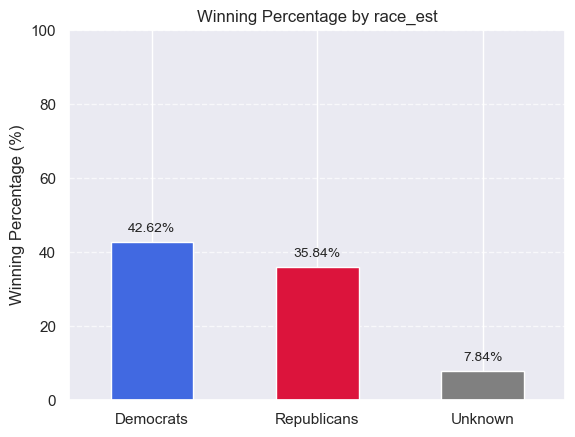

In [157]:
win_rate_by_pid = df.groupby('pid_est')['winner'].mean() * 100  # multiply by 100 to get percentage

labels = ['Democrats', 'Republicans', 'Unknown']
percentages = win_rate_by_pid.to_list()
x_pos = [0, 1, 2]

for i, value in enumerate(percentages):
    plt.text(x_pos[i], value+2, f'{value:.2f}%', ha='center', va='bottom', fontsize=10)

plt.bar(x_pos, percentages, color=['royalblue', 'crimson', 'grey'], width=0.5)
plt.xticks(x_pos, labels)
plt.ylabel('Winning Percentage (%)')
plt.title('Winning Percentage by race_est')
plt.ylim(0, 100)
plt.xlim(-0.5, 2.5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Candidate demographics**

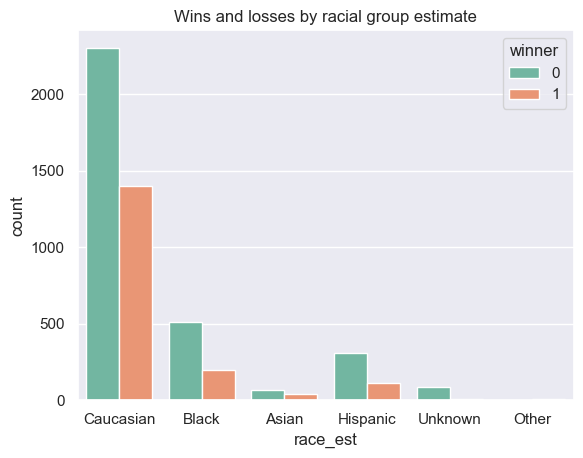

In [116]:
sns.countplot(x=df['race_est'] ,data=df, hue = df['winner'], palette="Set2")
plt.title("Wins and losses by racial group estimate")
plt.show()

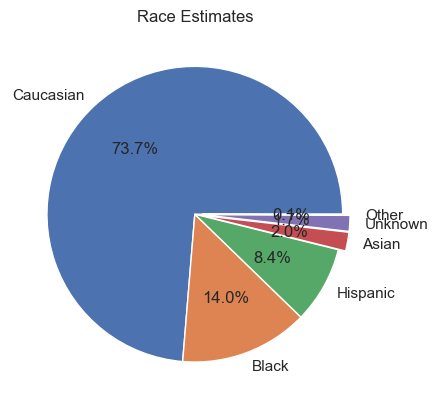

In [118]:
counts = df['race_est'].value_counts()
categories = counts.index
frequencies = counts.values

explode = [0.05 if freq / sum(frequencies) < 0.03 else 0 for freq in frequencies]

plt.pie(frequencies, labels=categories, autopct='%1.1f%%', explode=explode)
plt.title('Race Estimates')
plt.show()

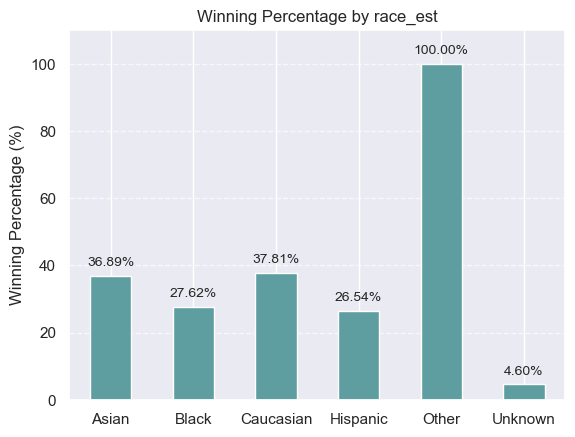

In [154]:
win_rate_by_race = df.groupby('race_est')['winner'].mean() * 100  # multiply by 100 to get percentage

labels = ['Asian', 'Black', 'Caucasian', 'Hispanic', 'Other', 'Unknown']
percentages = win_rate_by_race.to_list()
x_pos = [0, 1, 2, 3, 4, 5]

for i, value in enumerate(percentages):
    plt.text(x_pos[i], value+2, f'{value:.2f}%', ha='center', va='bottom', fontsize=10)

plt.bar(x_pos, percentages, color  = 'cadetblue', width=0.5)
plt.xticks(x_pos, labels)
plt.ylabel('Winning Percentage (%)')
plt.title('Winning Percentage by race_est')
plt.ylim(0, 110)
plt.xlim(-0.5, 5.5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

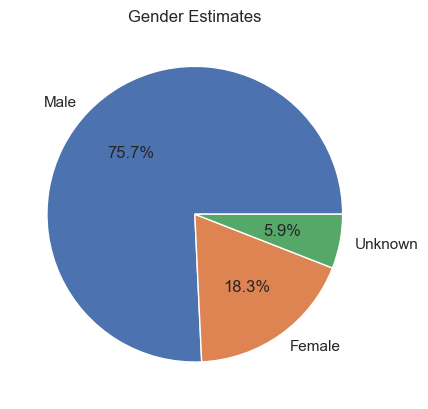

In [119]:
counts = df['gender_est'].value_counts()
categories = counts.rename({'M': 'Male', 'F': 'Female'}).index
frequencies = counts.values

plt.pie(frequencies, labels=categories, autopct='%1.1f%%')
plt.title('Gender Estimates')
plt.show()

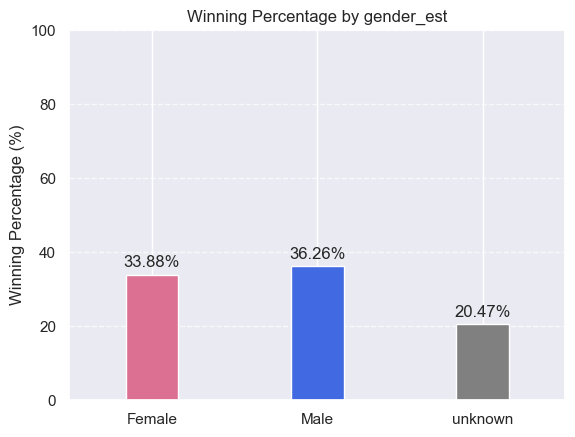

In [161]:
#df['win'] = df['winner'].map(lambda val: 1 if val == 'win' else 0)

win_rate_by_gender = df.groupby('gender_est')['winner'].mean() * 100  # multiply by 100 to get percentage

labels = ['Female', 'Male', 'unknown']
percentages = win_rate_by_gender.to_list()
x_pos = [0, 1, 2]

plt.bar(x_pos, percentages, color=['palevioletred', 'royalblue', 'grey'], width=0.32)

for i, value in enumerate(percentages):
    plt.text(x_pos[i], value+2, f'{value:.2f}%', ha='center')

plt.xticks(x_pos, labels)
plt.ylabel('Winning Percentage (%)')
plt.title('Winning Percentage by gender_est')
plt.ylim(0, 100)
plt.xlim(-0.5, 2.5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

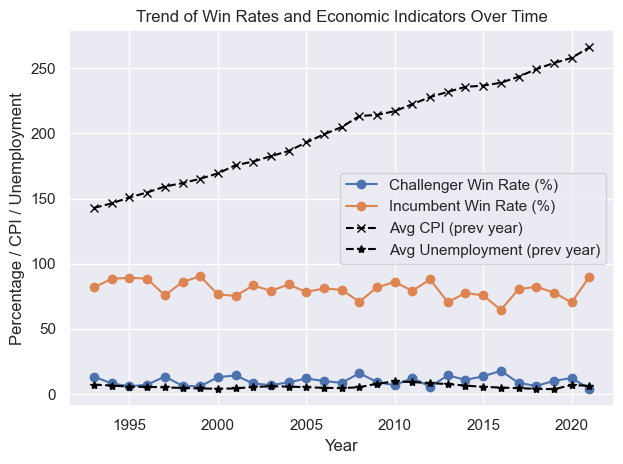

In [153]:
grouped = df.groupby(['year', 'incumbent'])[['winner', 'CPI 12Mo Avg', 'UE 12Mo Avg']].mean().reset_index()

for inc in grouped['incumbent'].unique():
    data = grouped[grouped['incumbent'] == inc]
    label = 'Incumbent' if inc == 1 else 'Challenger'
    plt.plot(data['year'], data['winner'] * 100, marker='o', label=f'{label} Win Rate (%)')

plt.plot(grouped['year'].unique(), 
         grouped.groupby('year')['CPI 12Mo Avg'].mean(), 
         color='black', linestyle='--', marker='x', label='Avg CPI (prev year)')

plt.plot(grouped['year'].unique(), 
         grouped.groupby('year')['UE 12Mo Avg'].mean(), 
         color='black', linestyle='--', marker='*', label='Avg Unemployment (prev year)')

plt.title('Trend of Win Rates and Economic Indicators Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage / CPI / Unemployment')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

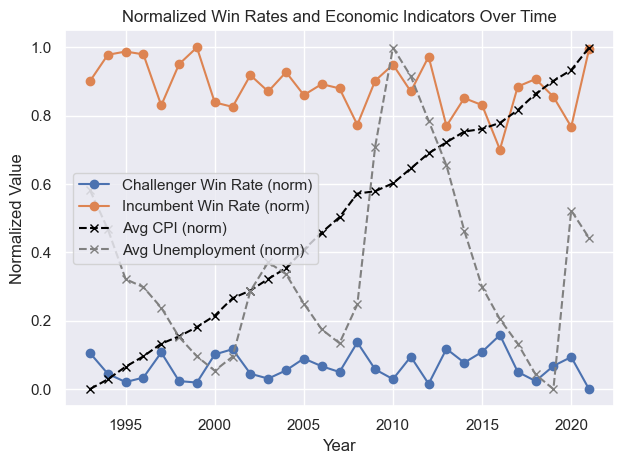

In [152]:

grouped = df.groupby(['year', 'incumbent'])[['winner', 'CPI 12Mo Avg', 'UE 12Mo Avg']].mean().reset_index()



for col in ['winner', 'CPI 12Mo Avg', 'UE 12Mo Avg']:
    min_val = grouped[col].min()
    max_val = grouped[col].max()
    grouped[f'{col}_norm'] = (grouped[col] - min_val) / (max_val - min_val)


for inc in grouped['incumbent'].unique():
    data = grouped[grouped['incumbent'] == inc]
    label = 'Incumbent' if inc == 1 else 'Challenger'
    plt.plot(data['year'], data['winner_norm'], marker='o', label=f'{label} Win Rate (norm)')

cpi_avg = grouped.groupby('year')['CPI 12Mo Avg_norm'].mean().reset_index()
ue_avg = grouped.groupby('year')['UE 12Mo Avg_norm'].mean().reset_index()

plt.plot(cpi_avg['year'], cpi_avg['CPI 12Mo Avg_norm'], color='black', linestyle='--', marker='x', label='Avg CPI (norm)')
plt.plot(ue_avg['year'], ue_avg['UE 12Mo Avg_norm'], color='gray', linestyle='--', marker='x', label='Avg Unemployment (norm)')


plt.title('Normalized Win Rates and Economic Indicators Over Time')
plt.xlabel('Year')
plt.ylabel('Normalized Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [145]:
df.groupby(['year', 'pid_est'])[['winner']].mean()

winner
year pid_est             
1993 Democrat    0.491228
     Republican  0.490566
     Unknown     0.050000
1994 Democrat    0.500000
     Republican  0.440000
...                   ...
2020 Republican  0.382353
     Unknown     0.146341
2021 Democrat    0.417391
     Republican  0.327273
     Unknown     0.046154

[87 rows x 1 columns]

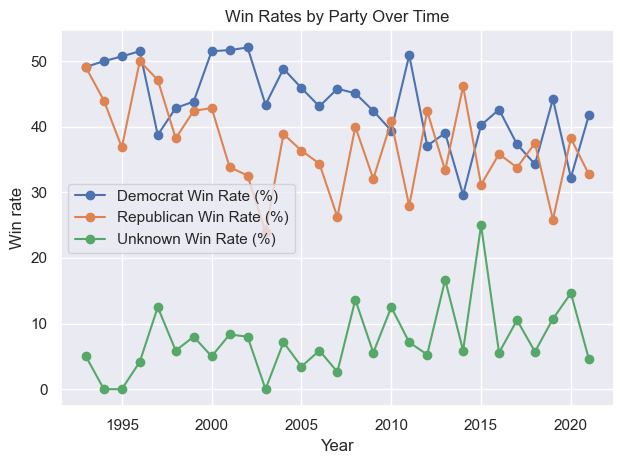

In [ ]:
grouped = df.groupby(['year', 'pid_est'])[['winner']].mean().reset_index()

for pid in grouped['pid_est'].unique():
    data = grouped[grouped['pid_est'] == pid]
    #label = 'Democrats' if inc == 'D' else 'Republicans' if inc == 'R' else 'unknown'
    plt.plot(data['year'], data['winner'] * 100, marker='o', label=f'{pid} Win Rate (%)')

plt.title('Win Rates by Party Over Time')
plt.xlabel('Year')
plt.ylabel('Win rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### **Variance of numeric variables**

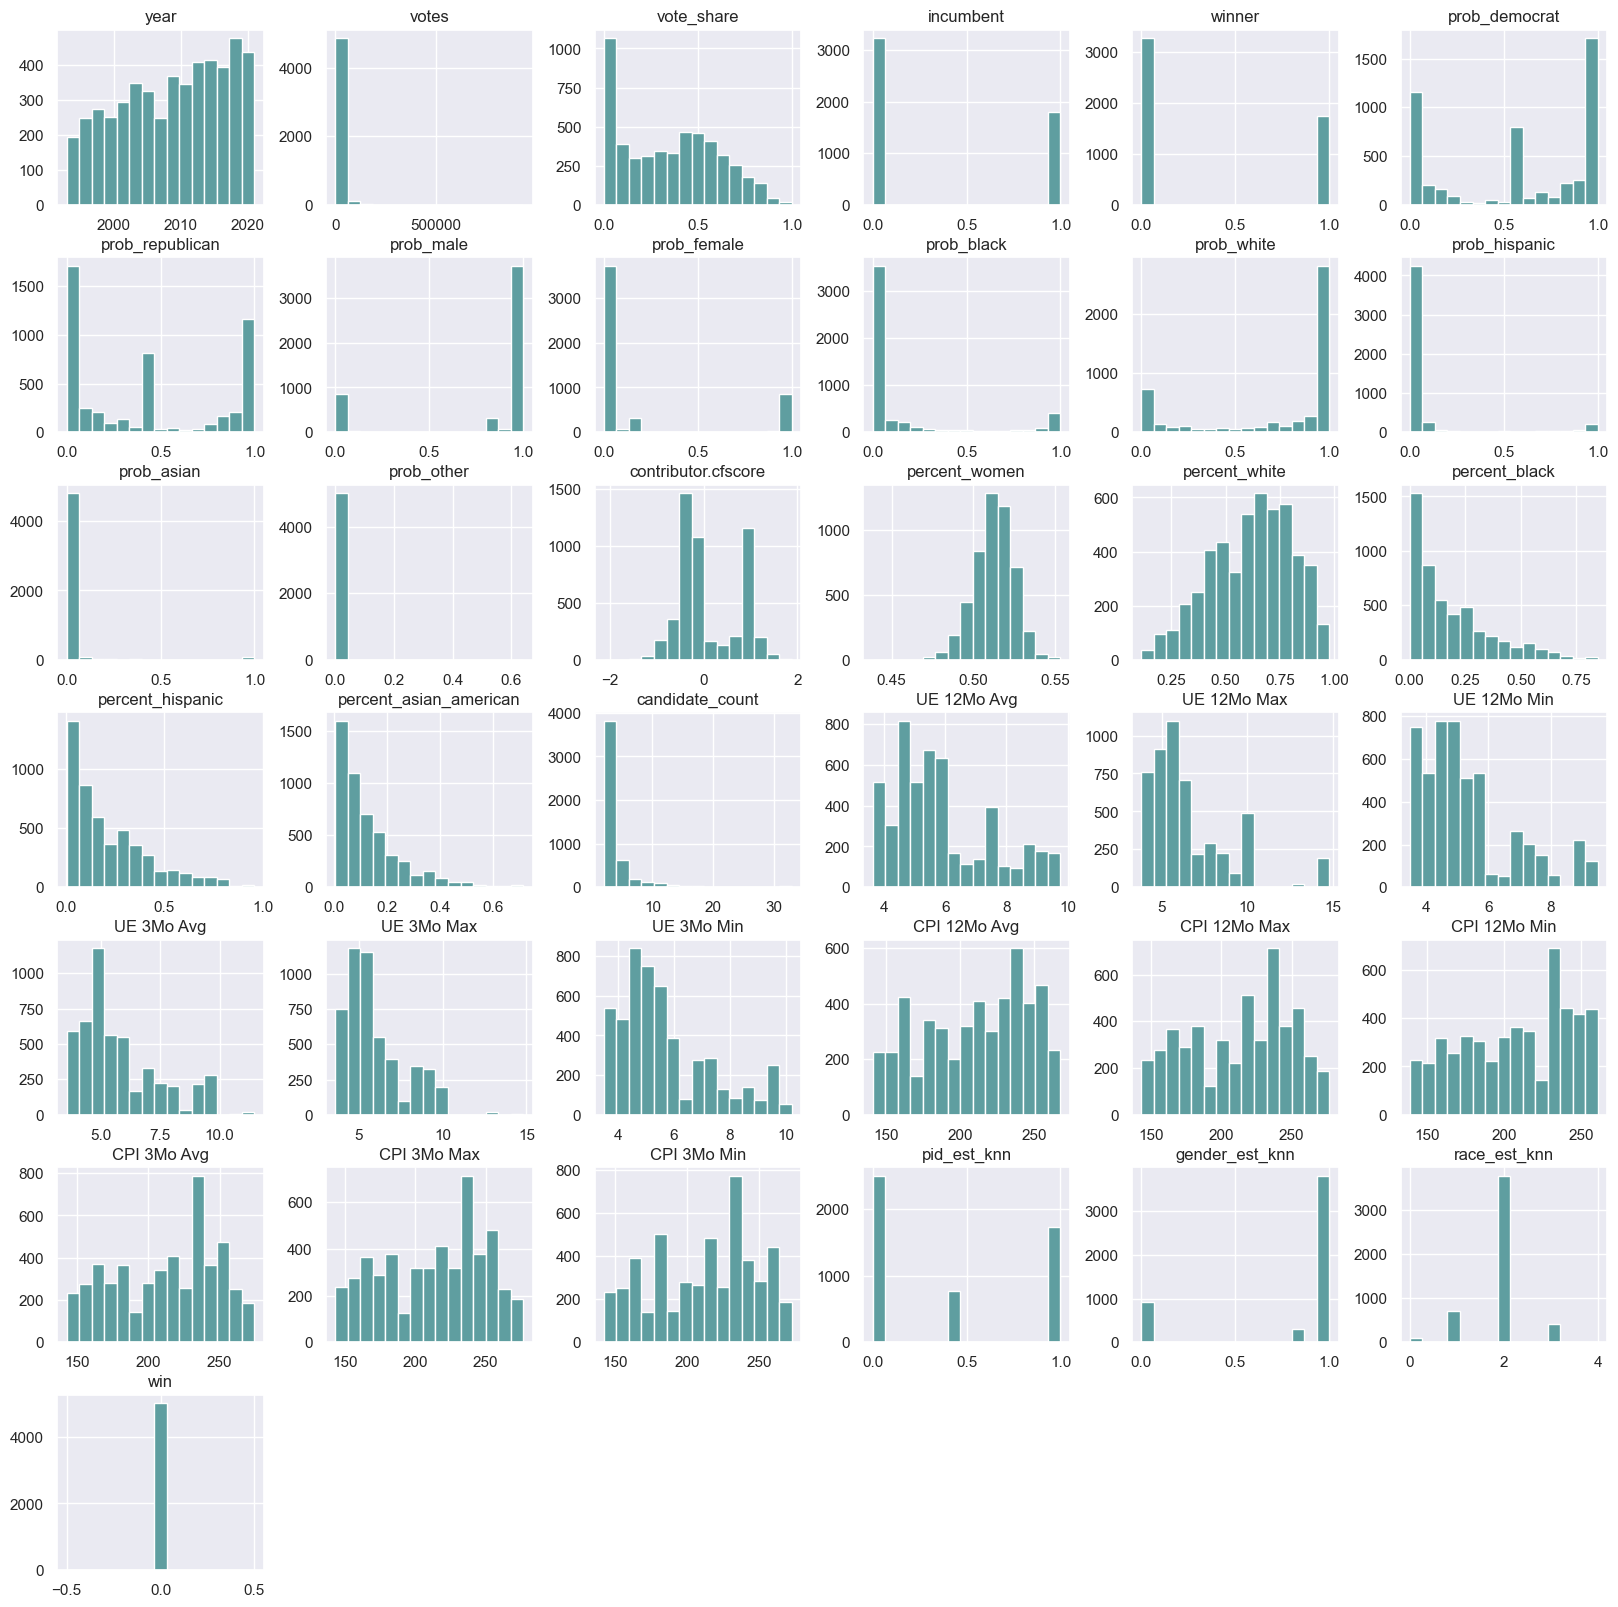

In [155]:
df.hist(figsize=(20,20),bins = 15, color = 'cadetblue')
plt.title("Features Distribution")
plt.show()

**Comments**
-  Lots of candidates in what looks like zero/very low vote share. Could represent the write ins. Would removing candidates that get a very low number of votes change our model? Maybe 
-  Vote share is mound shaped with extreme at 0 end. Looks like being just near the cut off is really common
-  Looks like most elections have 2-3 candidates
-  Noticeable drop in the number of elections in the mid-200s
-  The economic metrics follow similar distributions regardless of their time period



#### **Variance of economic variables**

**Unemployment distribution**

<Axes: xlabel='UE 3Mo Min', ylabel='Count'>

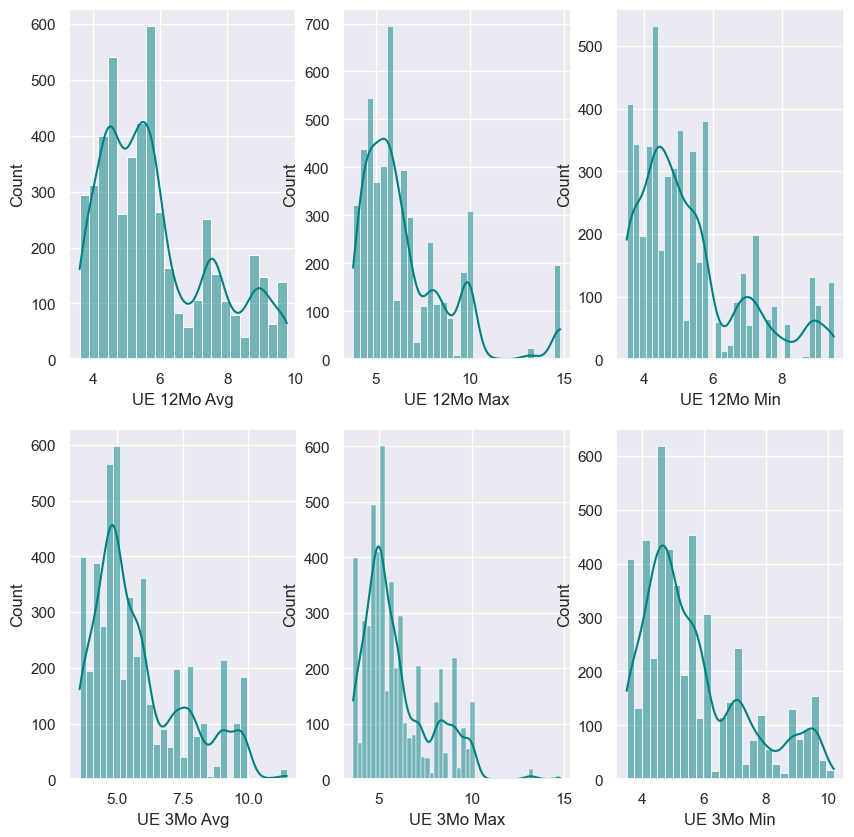

In [135]:
sns.set_theme(style="darkgrid")

fig, axs = plt.subplots(2, 3, figsize=(10, 10))

sns.histplot(data=df, x="UE 12Mo Avg",  kde=True, color="teal", ax=axs[0, 0])
sns.histplot(data=df, x="UE 12Mo Max", kde=True, color="teal", ax=axs[0, 1])
sns.histplot(data=df, x="UE 12Mo Min", kde=True, color="teal", ax=axs[0, 2])
sns.histplot(data=df, x="UE 3Mo Avg", kde=True, color="teal", ax=axs[1, 0])
sns.histplot(data=df, x="UE 3Mo Max", kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=df, x="UE 3Mo Min", kde=True, color="teal", ax=axs[1, 2])

**CPI distributions**

<Axes: xlabel='CPI 3Mo Min', ylabel='Count'>

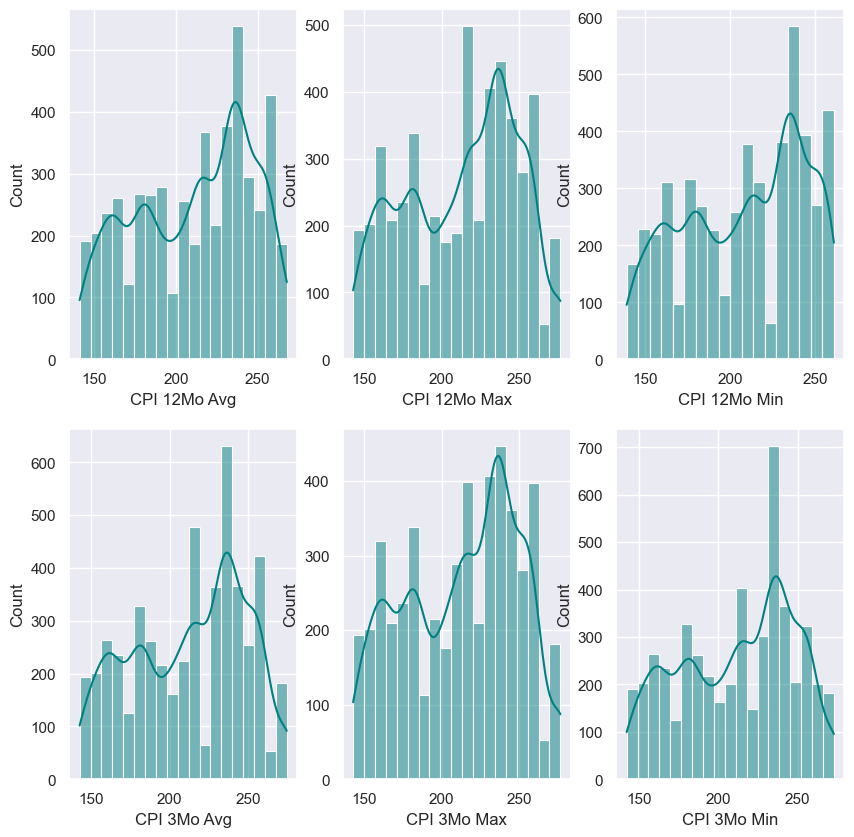

In [113]:
fig, axs = plt.subplots(2, 3, figsize=(10, 10))

sns.histplot(data=df, x="CPI 12Mo Avg",  kde=True, color="teal", ax=axs[0, 0])
sns.histplot(data=df, x="CPI 12Mo Max", kde=True, color="teal", ax=axs[0, 1])
sns.histplot(data=df, x="CPI 12Mo Min", kde=True, color="teal", ax=axs[0, 2])
sns.histplot(data=df, x="CPI 3Mo Avg", kde=True, color="teal", ax=axs[1, 0])
sns.histplot(data=df, x="CPI 3Mo Max", kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=df, x="CPI 3Mo Min", kde=True, color="teal", ax=axs[1, 2])

**Closer look into vote_share and candidate count**

<Axes: xlabel='candidate_count', ylabel='Count'>

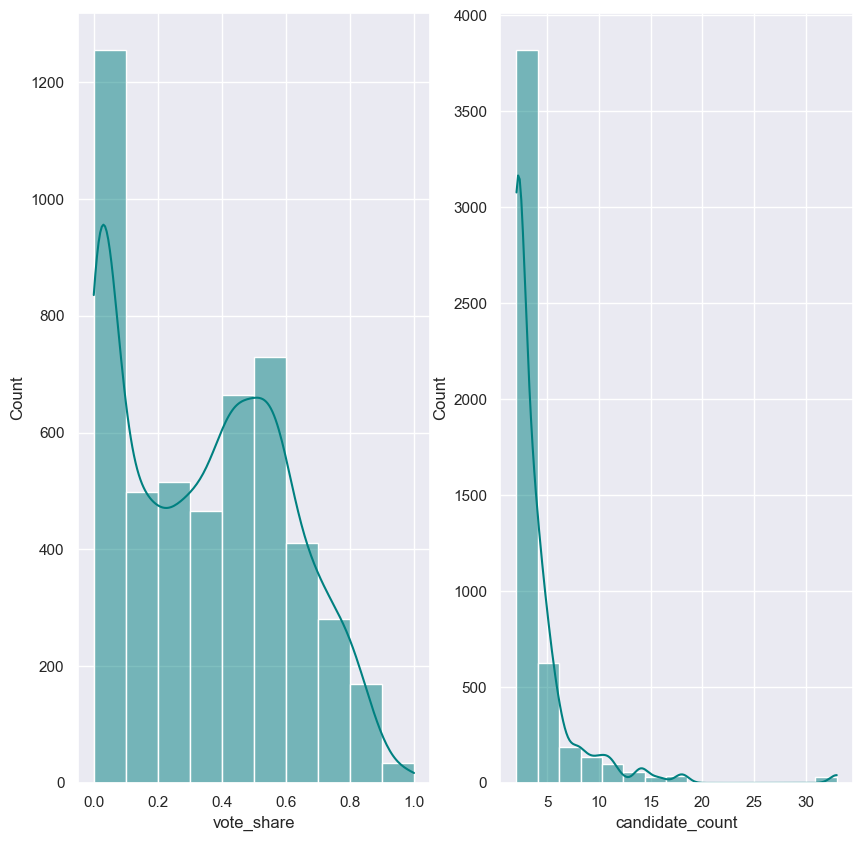

In [136]:
#Closer look at vote share

fig, axs = plt.subplots(1, 2, figsize=(10, 10))

sns.histplot(data=df, x="vote_share",  kde=True, color="teal", bins = 10,  ax=axs[0])
sns.histplot(data=df, x="candidate_count", kde=True, color="teal", bins = 15, ax=axs[1])



In [114]:
print(df['UE 12Mo Avg'].var())
print(df['UE 12Mo Max'].var())
print(df['UE 12Mo Min'].var())

print(df['UE 3Mo Avg'].var())
print(df['UE 3Mo Max'].var())
print(df['UE 3Mo Min'].var())

2.6485852029550907
5.997416894032977
2.302252671356627
2.9628285829346437
3.2452926949646614
2.7886654490287195


In [115]:
print(df['CPI 12Mo Avg'].var())
print(df['CPI 12Mo Max'].var())
print(df['CPI 12Mo Min'].var())

print(df['CPI 3Mo Avg'].var())
print(df['CPI 3Mo Max'].var())
print(df['CPI 3Mo Min'].var())

1278.8658595351192
1314.2938108299218
1248.4838992364357
1301.9366979384527
1312.323472869859
1293.4162944956931


**Assessing Correlation**

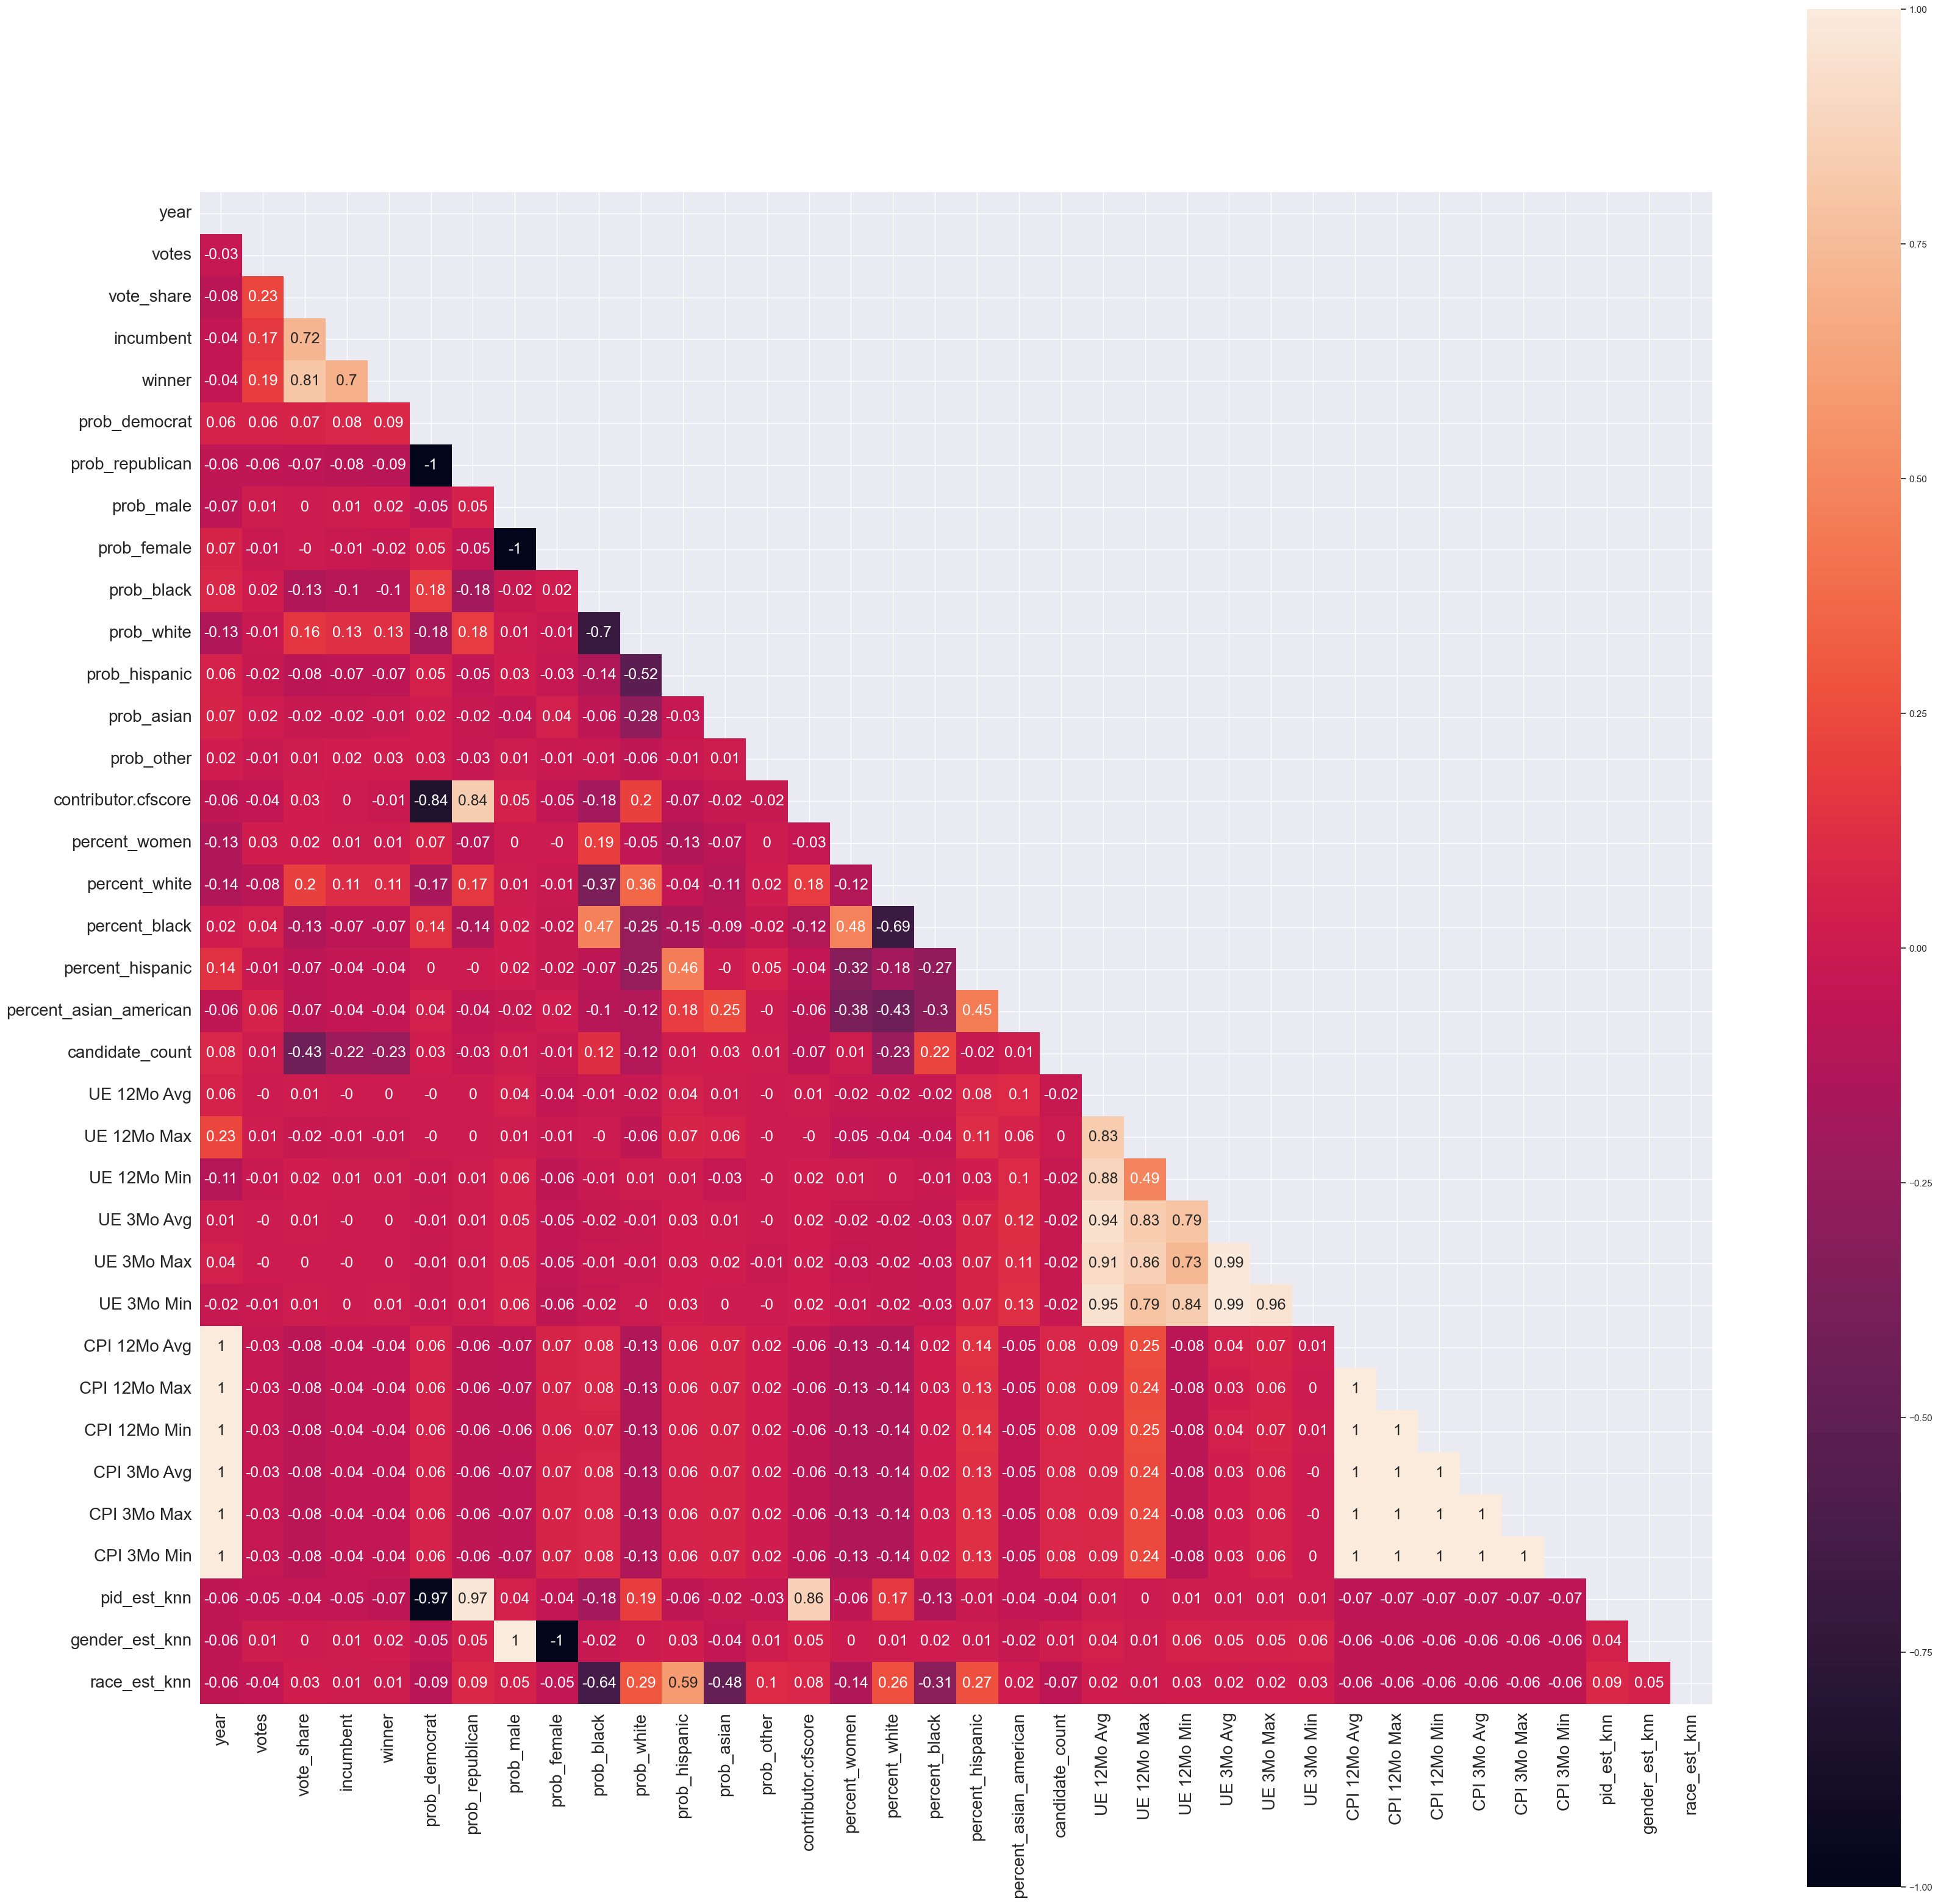

In [48]:
# Calculate correlation between each pair of variable

temp = df.select_dtypes(exclude=['object'])

corr_matrix=temp.corr().round(2)

mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True


# Draw the heatmap with the mask
plt.figure(figsize=(40, 40))
sns.heatmap(corr_matrix, mask=mask, square=True,annot=True, annot_kws={"size": 18})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()


**Comments**
- The economic variables are highly correlated so it makes more sense to include a few of these and not all of them 
-  We are not surprised to see that some are negatively correlated → for example contributor score is a range from -1 to 1 where -1 is represented conservative ideology  
-  High correlation amongst incumbent and vote share as well as incumbent and winner, we’ll want to try to make a model that improves predictions greater than just with the incumbent status – it will also be good to see what our model performance is without incumbent 
-  Also appears to be moderate correlation between the likelihood that a candidate is of a demographic and the percentage that demographic group represents in the municipality
